In [1]:
import pandas as pd 
import numpy as np  

%matplotlib inline
import matplotlib.pyplot as plt # type: ignore
plt.style.use('fivethirtyeight')

In [2]:
recipes = pd.read_csv('/Users/giovannimaya/Downloads/epi_r-1 (1).csv')
target = recipes['cake']
features = recipes.drop(columns=['cake'])
features.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
numeric_cols = features.select_dtypes(include=['number']).columns
medians = features[numeric_cols].median()
titles = features['title']
feats = features[numeric_cols].fillna(medians)
feats.head()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.000,331.0,8.0,17.0,294.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(feats)
pca = PCA()
pca.fit(scaled_data)
pca_transformed = pca.transform(scaled_data)
exp_variance = pca.explained_variance_ratio_
cum_exp_variance = np.cumsum(exp_variance)
pca_transformed[:5], exp_variance[:5], cum_exp_variance[:5]


(array([[ 1.72386304e+00, -1.76632351e+00, -9.76355107e-01, ...,
          1.14133960e-02, -7.98492276e-04,  2.45501931e-16],
        [ 2.30873501e+00,  8.85973522e-01, -1.56549987e+00, ...,
         -1.37635118e-02,  1.59568486e-03,  3.02639556e-15],
        [ 1.86053487e+00, -1.37800524e+00, -8.98822385e-01, ...,
         -6.84789696e-03,  4.50157615e-04, -2.12724225e-16],
        [-2.60890284e+00, -2.24073613e+00,  1.68332730e+00, ...,
         -1.79649608e-03, -8.04284067e-04,  5.62196603e-16],
        [ 6.73797632e-01, -7.85689450e-01, -1.80206742e+00, ...,
          3.64380141e-03,  3.24553059e-04, -8.46043180e-16]]),
 array([0.01100668, 0.00891426, 0.00723082, 0.00545247, 0.00532961]),
 array([0.01100668, 0.01992095, 0.02715177, 0.03260424, 0.03793385]))

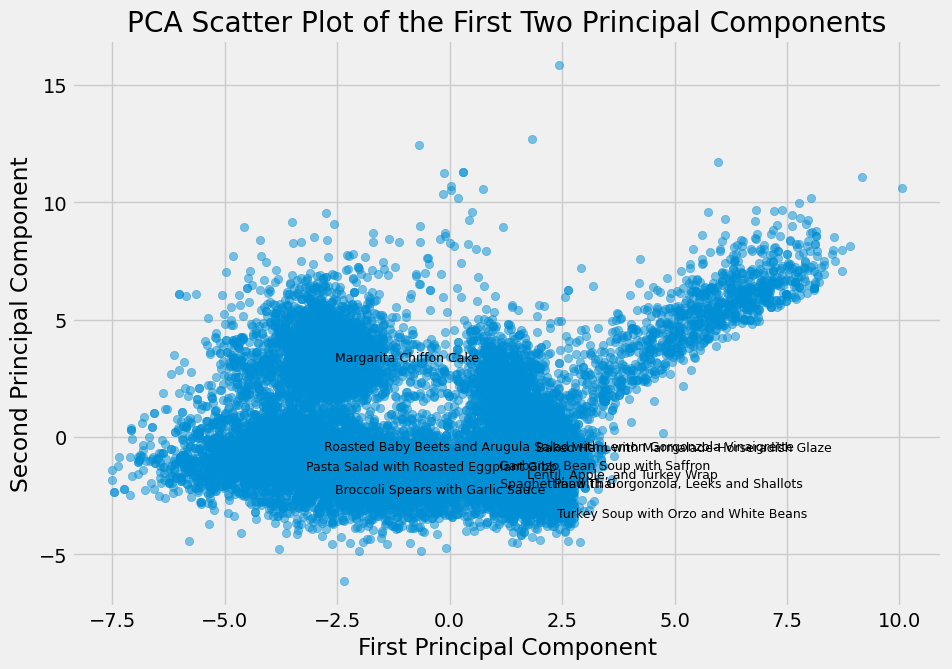

In [5]:
plt.figure(figsize=(10, 7))
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], alpha=0.5)
num_labels = 10
indices = np.linspace(0, len(pca_transformed) - 1, num_labels).astype(int) 
for i in indices:
    plt.text(pca_transformed[i, 0], pca_transformed[i, 1], recipes['title'].iloc[i], fontsize=9)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Scatter Plot of the First Two Principal Components')
plt.show()


In [6]:
# --- Q2 ----

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [12]:
X = pca_transformed 
y = recipes['cake']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Trying different values of C
C_values = np.logspace(-2, 2, 5)
print(C_values)
auc_scores = []

for C in C_values:
    clf = LogisticRegression(penalty='l1', C=C, solver='saga', max_iter=10000)
    clf.fit(X_train, y_train)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    auc_scores.append(auc)

# Find the optimal C
optimal_C = C_values[np.argmax(auc_scores)]
optimal_auc = max(auc_scores)
print(f'The optimal C value is {optimal_C} with an AUC of {optimal_auc}')


[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]
The optimal C value is 0.1 with an AUC of 0.9676184853890479
